In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

# 获取数据
安装kaggle命令行工具<br>
通过kaggle命令行工具下载plant数据<br>
kaggle command返回404，最后浏览器手动下载

In [3]:
# !{sys.executable} -m pip install kaggle --upgrade

In [4]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/home/oxape/.fastai/data/planet')

In [5]:
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar -p {path} 
# ! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  

In [6]:
# ! unzip -q -n {path}/train_v2.csv.zip -d {path}

In [17]:
#!conda install --yes --prefix {sys.prefix} -c haasad eidl7zip

In [18]:
# ! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}

In [7]:
path.ls()

[PosixPath('/home/oxape/.fastai/data/planet/train_v2.csv.zip'),
 PosixPath('/home/oxape/.fastai/data/planet/train-jpg'),
 PosixPath('/home/oxape/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/oxape/.fastai/data/planet/models'),
 PosixPath('/home/oxape/.fastai/data/planet/train-jpg.tar.7z')]

# 多分类

In [8]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [9]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [10]:
np.random.seed(42)

In [11]:
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')) #默认把column=1既第二列作为标签

In [12]:
data = (src.transform(tfms, size=128)
       .databunch()
       .normalize(imagenet_stats))

In [13]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

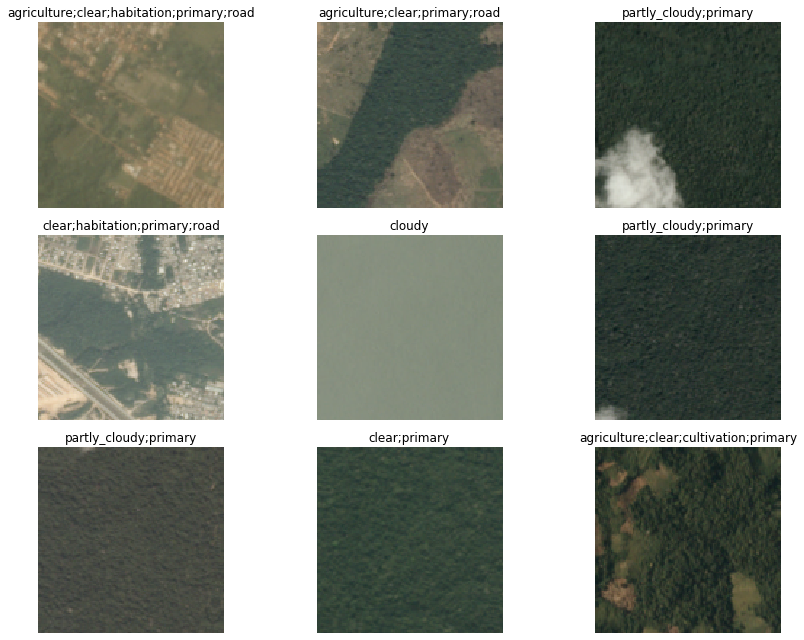

In [14]:
data.show_batch(rows=3, figsize=(12,9))

In [15]:
arch = models.resnet50

In [16]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


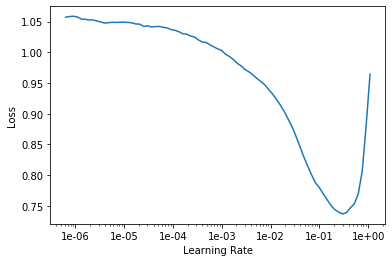

In [18]:
learn.recorder.plot()

In [19]:
lr = 0.01

In [20]:
slice(lr)

slice(None, 0.01, None)

In [21]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.136437,0.117772,0.946568,0.895702,00:47
1,0.111587,0.101287,0.953203,0.909332,00:47
2,0.102575,0.093426,0.954009,0.919558,00:47
3,0.095274,0.089743,0.956589,0.923710,00:47
4,0.092425,0.087309,0.956495,0.925274,00:47


In [37]:
learn.save('stage-1-rn50')

In [38]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


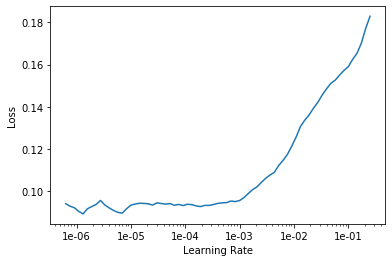

In [39]:
learn.lr_find()
learn.recorder.plot()